In [1]:
import numpy as np
import pandas as pd
import graphviz
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

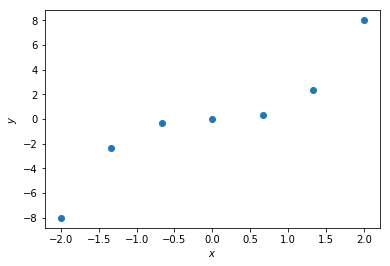

In [315]:
X = np.linspace(-2,2,7)
y = X**3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

In [319]:
print('X: ',X)
print('y: ',y)

X:  [-2.         -1.33333333 -0.66666667  0.          0.66666667  1.33333333
  2.        ]
y:  [-8.         -2.37037037 -0.2962963   0.          0.2962963   2.37037037
  8.        ]


In [316]:
def regression_var_criterion(X, y, t):
    D_X = 1/len(X)*np.sum((np.round(y,5)-\
                           1/len(X)*np.sum(np.round(y,5)))**2)
    Xl = []
    Xr = []
    yr = []
    yl = []
    for i in range(len(X)):
        if X[i] < t:
            Xl.append(X[i])
            yl.append(y[i])
        else:
            Xr.append(X[i])
            yr.append(y[i])
    yr = np.array(yr)
    yl = np.array(yl)
    D_Xl = 1/len(Xl)*np.sum((np.round(yl,5)-\
                                 1/len(Xl)*np.sum(np.round(yl,5)))**2)
    D_Xr = 1/len(Xr)*np.sum((np.round(yr,5)-\
                                 1/len(Xr)*np.sum(np.round(yr,5)))**2)
    Q = D - len(Xl)/len(X)*D_Xl - len(Xr)/len(X)*D_Xr
    
    return Q
#Q1 = regression_var_criterion(X, y, t)
print(regression_var_criterion(X, y, -1))
print(regression_var_criterion(X, y, 0))
#for i in list(X):
#    if i == -2:
#        continue
#    print('\ni=', i,'\nQ=', regression_var_criterion(X, y, i))
##regression_var_criterion(X, y, -2)

10.754457393689997
9.481487407408334


In [317]:
z = np.zeros(7)
l = np.linspace(-1.5,-1.5,7)
r = np.linspace(1.5,1.5,7)

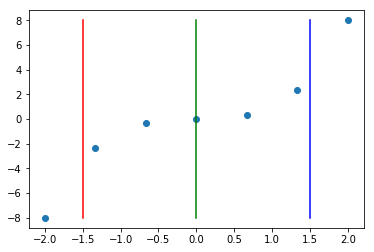

In [318]:
plt.scatter(X, y)
plt.plot(z, y, "g");
plt.plot(l, y, "r");
plt.plot(r, y, "b");

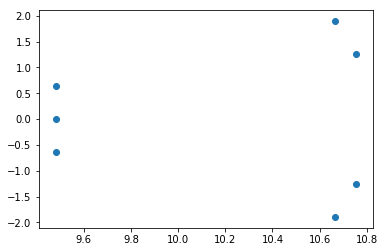

In [288]:
t = np.linspace(-1.9,1.9,7)
Q1 = []
for i in range(len(t)):
    Q1.append(regression_var_criterion(X, y, t[i]))
Q1 = np.array(Q1)    
plt.scatter(Q1, t);

In [207]:
tree = DecisionTreeRegressor(max_depth=2, random_state=17)

In [208]:
X1 = X.reshape(-1, 1)
y1 = y.reshape(-1, 1)
tree.fit(X1, y1)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=17, splitter='best')

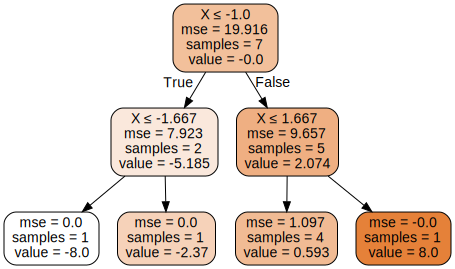

In [209]:
dot_data = export_graphviz(tree, feature_names='X',out_file=None,\
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [16]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)

In [2]:
df = pd.read_csv('../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [57]:
#df.head(10)

In [3]:
df['age_in_years'] = df['age']//365

In [4]:
chole = pd.get_dummies(df['cholesterol'],prefix='chole')
#chole.head(10)

In [5]:
gluc = pd.get_dummies(df['gluc'],prefix='gluc')
#gluc.head(10)

## One Hot Encoding (OHE) - Фиктивная кодировка

In [6]:
data = pd.concat([df, chole, gluc], axis=1).drop(columns = ['cholesterol','gluc'])
data.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_in_years,chole_1,chole_2,chole_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0


In [33]:
y = data['cardio']

In [44]:
data1 = data.drop('cardio', axis=1)

In [385]:
X_train, X_valid, y_train, y_valid = train_test_split(data1, y, test_size=0.3,random_state=17)

In [406]:
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=17)

In [407]:
clf_tree.fit(X_train, y_train);

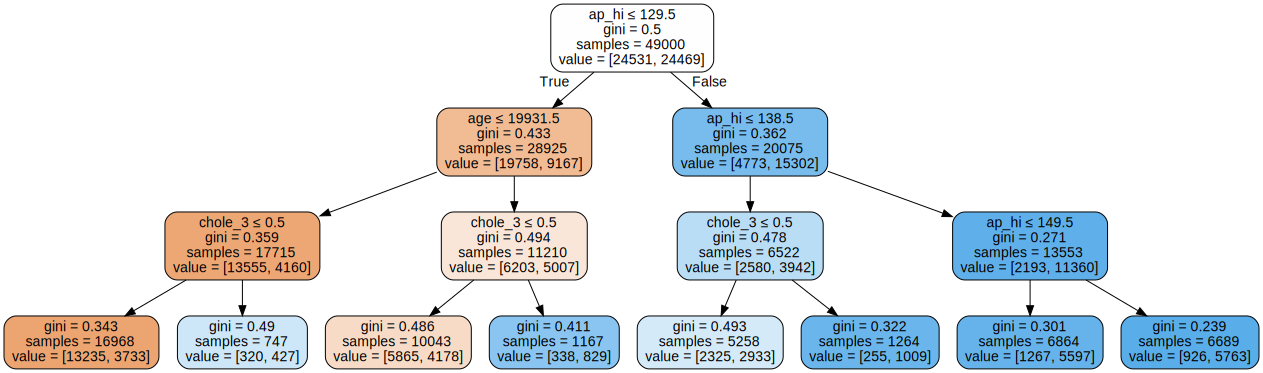

In [408]:
dot_clf_tree = export_graphviz(clf_tree, feature_names=data1.columns,\
                            out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_clf_tree)
graph

## 1.Train the decision tree on the dataset (X_train, y_train) with max depth equals to 3 and random_state=17

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(data1, y, test_size=0.3,random_state=17)
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train);

## 2.Make predictions for holdout data (X_valid, y_valid) with the trained decision tree. Calculate accuracy.

In [58]:
tree_pred = tree.predict(X_valid)
acc1 = accuracy_score(y_valid, tree_pred)
acc1

0.7212857142857143

## 3.Set up the depth of the tree using cross-validation on the dataset (X_train, y_train) in order to increase quality of the model.

In [59]:
tree_params = {'max_depth': [2,3,4,5,6,7,8,9,10]}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1,
verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

## 4.Draw the plot to show how mean accuracy is changing in regards to max_depth value on cross-validation.

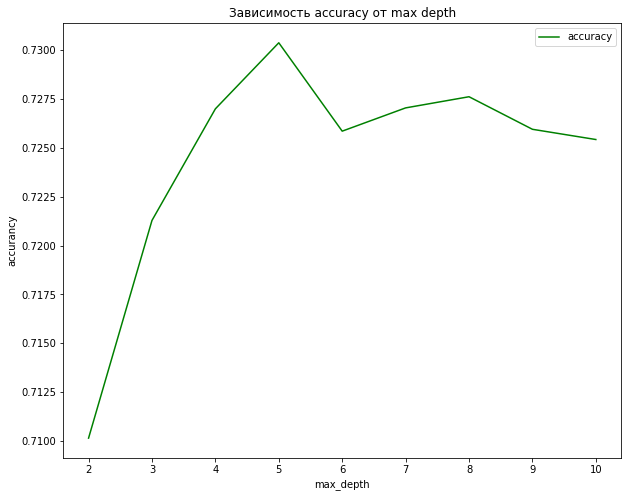

In [66]:
accuracy = []
max_depth = [2,3,4,5,6,7,8,9,10]

for i in max_depth:

    plot_tree = DecisionTreeClassifier(max_depth=i,random_state=17)
    plot_tree.fit(X_train, y_train)
    plot_tree_valid  = plot_tree.predict(X_valid)
    accuracy.append(accuracy_score(y_valid, plot_tree_valid))
    
plt.rcParams['figure.figsize'] = (10,8)
plt.plot(max_depth, accuracy,'g', label='accuracy');
plt.title('Зависимость accuracy от max depth')
plt.xlabel('max_depth')
plt.ylabel('accurancy')
plt.legend();


## 5.Print the best value of max_depth where the mean value of cross-validation quality metric reachs maximum.

In [60]:
tree_grid.best_params_

{'max_depth': 6}

In [51]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

## 6.Compute accuracy on holdout data.

In [65]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
tree.fit(X_train, y_train);
tree_pred = tree.predict(X_valid)
acc2 = accuracy_score(y_valid, tree_pred)
acc2

0.7303809523809524

In [64]:
acc2 = accuracy_score(y_valid, tree_grid.predict(X_valid))
acc2

0.7258571428571429

In [63]:
(acc2-acc1)/acc1* 100

1.2609757707796854

In [125]:
1 - np.mean(y)

0.5003

In [7]:
data['age_in_years_1'] = ((data['age_in_years'] >=40)&(data['age_in_years'] <50)).astype(int)
data['age_in_years_2'] = ((data['age_in_years'] >=60)&(data['age_in_years'] <65)).astype(int)

In [8]:
young = pd.get_dummies(data['age_in_years_1'],prefix='young')
old = pd.get_dummies(data['age_in_years_2'],prefix='old')

In [9]:
data_z = pd.concat([data, young, old], axis=1).drop(columns = ['age_in_years_1','age_in_years_2'])

In [10]:
data_z

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,...,chole_1,chole_2,chole_3,gluc_1,gluc_2,gluc_3,young_0,young_1,old_0,old_1
id,,,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
1,20228,1,156,85.0,140,90,0,0,1,1,...,0,0,1,1,0,0,1,0,1,0
2,18857,1,165,64.0,130,70,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
3,17623,2,169,82.0,150,100,0,0,1,1,...,1,0,0,1,0,0,0,1,1,0
4,17474,1,156,56.0,100,60,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
8,21914,1,151,67.0,120,80,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
9,22113,1,157,93.0,130,80,0,0,1,0,...,0,0,1,1,0,0,1,0,0,1
12,22584,2,178,95.0,130,90,0,0,1,1,...,0,0,1,0,0,1,1,0,0,1
13,17668,1,158,71.0,110,70,0,0,1,0,...,1,0,0,1,0,0,0,1,1,0


In [12]:
#systolic blood pressure: ap_hi∈[120,140),ap_hi∈[140,160),ap_hi∈[160,180), (3 features)

In [13]:
data_z['ap_hi_1'] = ((data_z['ap_hi'] >=120)&(data_z['ap_hi'] <140)).astype(int)
data_z['ap_hi_2'] = ((data_z['ap_hi'] >=140)&(data_z['ap_hi'] <160)).astype(int)
data_z['ap_hi_3'] = ((data_z['ap_hi'] >=160)&(data_z['ap_hi'] <180)).astype(int)

In [14]:
data_z.drop('ap_hi',axis=1, inplace=True)

In [17]:
data_z

,age,gender,height,weight,ap_lo,smoke,alco,active,cardio,age_in_years,chole_1,chole_2,chole_3,gluc_1,gluc_2,gluc_3,young_0,young_1,old_0,old_1,ap_hi_1,ap_hi_2,ap_hi_3
id,,,,,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,80,0,0,1,0,50,1,0,0,1,0,0,1,0,1,0,0,0,0
1,20228,1,156,85.0,90,0,0,1,1,55,0,0,1,1,0,0,1,0,1,0,0,1,0
2,18857,1,165,64.0,70,0,0,0,1,51,0,0,1,1,0,0,1,0,1,0,1,0,0
3,17623,2,169,82.0,100,0,0,1,1,48,1,0,0,1,0,0,0,1,1,0,0,1,0
4,17474,1,156,56.0,60,0,0,0,0,47,1,0,0,1,0,0,0,1,1,0,0,0,0
8,21914,1,151,67.0,80,0,0,0,0,60,0,1,0,0,1,0,1,0,0,1,1,0,0
9,22113,1,157,93.0,80,0,0,1,0,60,0,0,1,1,0,0,1,0,0,1,1,0,0
12,22584,2,178,95.0,90,0,0,1,1,61,0,0,1,0,0,1,1,0,0,1,1,0,0
13,17668,1,158,71.0,70,0,0,1,0,48,1,0,0,1,0,0,0,1,1,0,0,0,0


In [25]:
data_z.rename(columns={'gender': 'male'}, inplace=True)

In [29]:
data_z['male'] = data_z['male'].map({1:0,2:1})

In [31]:
data_tree = data_z.drop(columns=['age','height','weight','ap_lo','smoke','alco',\
                                 'active','age_in_years','gluc_1','gluc_2','gluc_3'])

In [38]:
X = data_tree.drop('cardio',axis=1)

In [42]:
X

,male,chole_1,chole_2,chole_3,young_0,young_1,old_0,old_1,ap_hi_1,ap_hi_2,ap_hi_3
id,,,,,,,,,,,
0,1,1,0,0,1,0,1,0,0,0,0
1,0,0,0,1,1,0,1,0,0,1,0
2,0,0,0,1,1,0,1,0,1,0,0
3,1,1,0,0,0,1,1,0,0,1,0
4,0,1,0,0,0,1,1,0,0,0,0
8,0,0,1,0,1,0,0,1,1,0,0
9,0,0,0,1,1,0,0,1,1,0,0
12,1,0,0,1,1,0,0,1,1,0,0
13,0,1,0,0,0,1,1,0,0,0,0


In [40]:
treee = DecisionTreeClassifier(max_depth=3, random_state=17)

In [41]:
treee.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

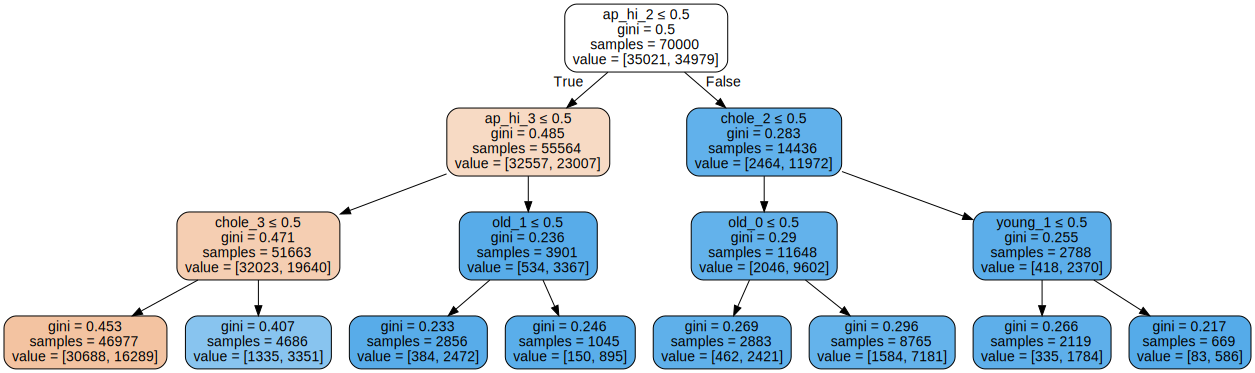

In [43]:
dot_clf_treee = export_graphviz(treee, feature_names=X.columns,\
                            out_file=None, filled=True, rounded=True, special_characters=True)
graph1 = graphviz.Source(dot_clf_treee)
graph1